I am continuing working on analyzing data and improving my model.

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

import scipy.stats as stats
from math import sqrt

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

import itertools
from itertools import combinations

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [23]:
df = pd.read_csv('dataframe.csv')
df_time = pd.read_csv('zillow_data.csv')

In [24]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

#### Setting Index to Date Time

In [25]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [26]:
#indexing the date time index to get my range of dates
date_time_idx_0 = get_datetimes(df_time)
date_time_idx_0

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [27]:
date_time_idx_1 = date_time_idx_0[-88:-4]
date_time_idx_1

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

In [28]:
date_time_idx = date_time_idx_1.strftime('%Y-%m')
date_time_idx

Index(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', 

In [29]:
df = df.set_index(date_time_idx)
df

,77084,77036,77077,77095,77082,77057,77007,77070,77081,77063,77042,77072,77015,77008,77040
2011-01,118800.0,125000.0,207100.0,155600.0,118900.0,439200.0,297300.0,144400.0,259500.0,244100.0,256900.0,83700.0,86700.0,289000.0,120500.0
2011-02,118300.0,125400.0,207100.0,154600.0,118200.0,436900.0,296600.0,143800.0,257300.0,243800.0,255400.0,83400.0,86400.0,288700.0,119700.0
2011-03,118200.0,125900.0,207600.0,154500.0,117900.0,435100.0,296600.0,143200.0,256000.0,244100.0,255000.0,82800.0,86300.0,289000.0,119500.0
2011-04,118100.0,126200.0,209100.0,154800.0,117500.0,435200.0,297200.0,142900.0,258400.0,244400.0,255700.0,82200.0,86300.0,290100.0,119700.0
2011-05,118000.0,126400.0,210700.0,155100.0,117000.0,436600.0,298200.0,142800.0,261900.0,245600.0,256500.0,82100.0,86200.0,292000.0,119600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08,158700.0,174600.0,310000.0,210200.0,166600.0,566500.0,403600.0,192700.0,371700.0,336700.0,381600.0,122900.0,125900.0,421000.0,164600.0
2017-09,160200.0,175000.0,310800.0,210700.0,167600.0,567200.0,405600.0,193400.0,370000.0,337600.0,381300.0,122800.0,126200.0,423500.0,165200.0
2017-10,161900.0,176000.0,311600.0,211200.0,168400.0,566600.0,407100.0,193900.0,370200.0,337400.0,381800.0,123700.0,127100.0,425500.0,166300.0
2017-11,162800.0,177200.0,311800.0,212300.0,169000.0,562200.0,406600.0,194500.0,372300.0,338900.0,382000.0,124800.0,128500.0,426500.0,168600.0


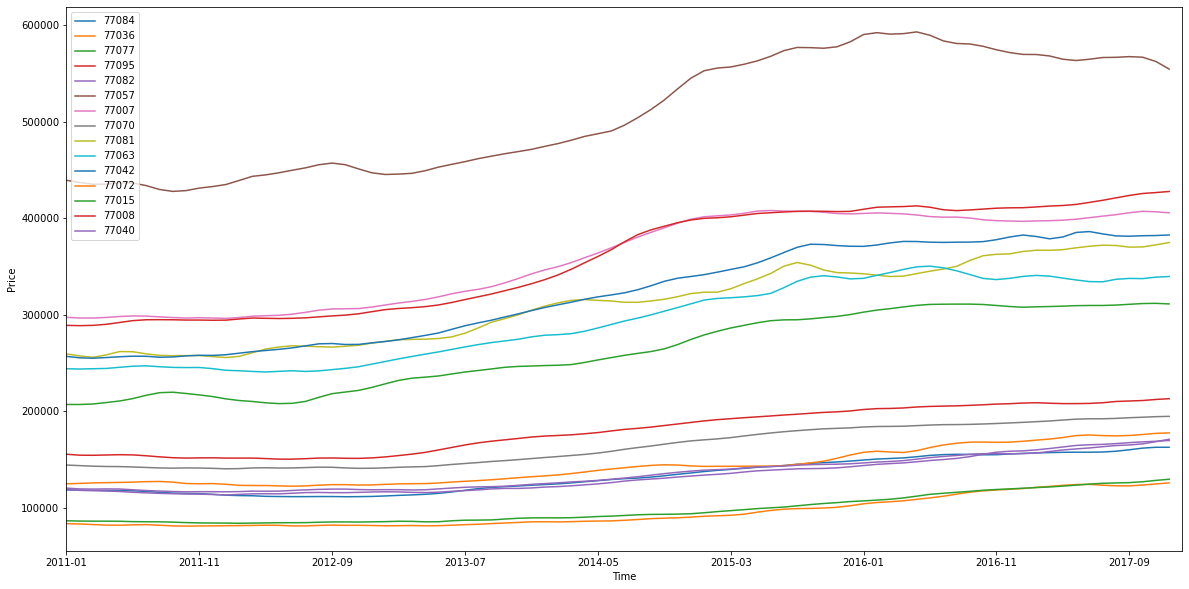

In [30]:
df.plot(figsize=(20,10), 
                  use_index=True, 
                  xlim=(0,84), 
                  xlabel='Time', 
                  ylabel='Price');

### Compare Beginning and End of Year Prices

In [31]:
year_trend = pd.DataFrame()

#number of months to add on from janurary
num_mon = 11

#loop through each column the loop through each row,
# differencing the begining and end of year.
for i in range(0,len(df.columns)):
    print('')
    print(df.columns[i])
    print('__________________________________________________________________')
    
    profit_per_year = []
    
    for j in range(0,len(df.index),12):
        profit = df.iloc[j+num_mon, i]-df.iloc[j, i]
        print('{}:{}'.format(df.index[j], df.index[j+num_mon]))
        print(profit)
        print('---------------------------------------------------------')
        
        profit_per_year.append(profit)
    
    #year trend dict for creating df
    yr_tr_dict = {df.columns[i]:profit_per_year}
    
    df_yr_tr = pd.DataFrame(yr_tr_dict)
    year_trend = pd.concat([year_trend, df_yr_tr], axis=1)


77084
__________________________________________________________________
2011-01:2011-12
-4700.0
---------------------------------------------------------
2012-01:2012-12
-1300.0
---------------------------------------------------------
2013-01:2013-12
11100.0
---------------------------------------------------------
2014-01:2014-12
12000.0
---------------------------------------------------------
2015-01:2015-12
10800.0
---------------------------------------------------------
2016-01:2016-12
6300.0
---------------------------------------------------------
2017-01:2017-12
6300.0
---------------------------------------------------------

77036
__________________________________________________________________
2011-01:2011-12
200.0
---------------------------------------------------------
2012-01:2012-12
-700.0
---------------------------------------------------------
2013-01:2013-12
7900.0
---------------------------------------------------------
2014-01:2014-12
10300.0
--------------

In [32]:
year_trend.index = date_time_idx_1.strftime('%Y').unique()

In [33]:
year_trend

,77084,77036,77077,77095,77082,77057,77007,77070,77081,77063,77042,77072,77015,77008,77040
2011,-4700.0,200.0,8200.0,-3700.0,-5000.0,-6500.0,-700.0,-3400.0,-2800.0,100.0,1000.0,-2300.0,-2300.0,5300.0,-3700.0
2012,-1300.0,-700.0,11900.0,200.0,3000.0,12100.0,11800.0,600.0,15000.0,6400.0,12300.0,200.0,1300.0,8800.0,2100.0
2013,11100.0,7900.0,18400.0,20600.0,4000.0,26000.0,32200.0,9600.0,32200.0,25500.0,32000.0,4100.0,3900.0,26800.0,5500.0
2014,12000.0,10300.0,27000.0,14100.0,11400.0,70600.0,52500.0,17200.0,13000.0,32500.0,32100.0,4800.0,4200.0,61800.0,12900.0
2015,10800.0,11800.0,21100.0,10300.0,8600.0,30000.0,3000.0,12400.0,19900.0,21900.0,29400.0,10900.0,11600.0,7200.0,6600.0
2016,6300.0,10500.0,5800.0,6000.0,14800.0,-18700.0,-7900.0,4200.0,20600.0,0.0,9700.0,15000.0,12400.0,1500.0,9400.0
2017,6300.0,8700.0,3400.0,4500.0,10700.0,-15200.0,8800.0,6200.0,9300.0,-100.0,100.0,5800.0,9300.0,16800.0,14900.0


In [34]:
year_trend['Mean_profit'] = [year_trend.iloc[i].mean() for i in range(len(year_trend.index))]

In [35]:
year_trend['Mean_profit']

2011    -1353.333333
2012     5580.000000
2013    17320.000000
2014    25093.333333
2015    14366.666667
2016     5973.333333
2017     5966.666667
Name: Mean_profit, dtype: float64

#### SARIMA

Determine 'pdq' for SARIMA model. Since each future value predicted is dependent on where previous value was. Each effect is weighted, how much the error is, and each error combined with the last. 
- number of Auto-Regressive terms (p): uses the effect of past values into the model
- number of Differences (d): amount of differencing as it identifies the numer of lag values to subtract from the current observation. 
- number of Moving Average terms (q): set the error of the model as a linear combination of the error values observed previous time points in the past. 

In [36]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [37]:
def pdq_func(df):
    ans = []

    for comb in pdq:
            for combs in pdqs:
                try:
                    mod = SARIMAX(df,
                                  order=comb,
                                  seasonal_order=combs,
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

                    output = mod.fit()
                    ans.append([comb, combs, output.aic])
                except:
                    continue
                    
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    
    return ans_df.loc[ans_df['aic'].idxmin()]

In [38]:
pdq_li= []
pdqs_li = []
for c in df.columns:
    a = pdq_func(df[c])
    pdq_li.append(a[0])
    pdqs_li.append(a[1])
    print(a)
    print('')

pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic        845.013003
Name: 59, dtype: object

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic        906.440006
Name: 63, dtype: object

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic        924.881463
Name: 63, dtype: object

pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic        845.104604
Name: 59, dtype: object

pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic        848.330653
Name: 59, dtype: object

pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic       1051.945377
Name: 59, dtype: object

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic        941.889327
Name: 63, dtype: object

pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic        819.822075
Name: 59, dtype: object

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic       1038.059726
Name: 63, dtype: object

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic       1003.608801
Name: 63, dtype: object

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic        987.367659
Name: 63, dtype: object


The best pdq options. These will be used in the SARIMA model and decide on the best combination output. 

In [39]:
def sarimax_model(df, pdq, pdqs, start=None, end=None ):
    model = SARIMAX(df,
                    order=pdq, 
                    seasonal_order=pdqs, 
                    enforce_stationarity=False, 
                    enforce_invertibility=False)
    #fit model
    output = model.fit()
    #predictions
    pred = output.get_prediction(start=pd.to_datetime(start), end=pd.to_datetime(end),dynamic=False)
    return pred

In [40]:
zip_col = list(df.columns)
zip_col

['77084',
 '77036',
 '77077',
 '77095',
 '77082',
 '77057',
 '77007',
 '77070',
 '77081',
 '77063',
 '77042',
 '77072',
 '77015',
 '77008',
 '77040']

In [41]:
# chosen zipcode dataframe up to 2016
zipcode_2016 = df.loc[:'2016-12']
zipcode_2016

,77084,77036,77077,77095,77082,77057,77007,77070,77081,77063,77042,77072,77015,77008,77040
2011-01,118800.0,125000.0,207100.0,155600.0,118900.0,439200.0,297300.0,144400.0,259500.0,244100.0,256900.0,83700.0,86700.0,289000.0,120500.0
2011-02,118300.0,125400.0,207100.0,154600.0,118200.0,436900.0,296600.0,143800.0,257300.0,243800.0,255400.0,83400.0,86400.0,288700.0,119700.0
2011-03,118200.0,125900.0,207600.0,154500.0,117900.0,435100.0,296600.0,143200.0,256000.0,244100.0,255000.0,82800.0,86300.0,289000.0,119500.0
2011-04,118100.0,126200.0,209100.0,154800.0,117500.0,435200.0,297200.0,142900.0,258400.0,244400.0,255700.0,82200.0,86300.0,290100.0,119700.0
2011-05,118000.0,126400.0,210700.0,155100.0,117000.0,436600.0,298200.0,142800.0,261900.0,245600.0,256500.0,82100.0,86200.0,292000.0,119600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08,155500.0,167000.0,311000.0,205700.0,151300.0,580800.0,401100.0,186300.0,350100.0,345500.0,375100.0,114300.0,116200.0,407800.0,154300.0
2016-09,155400.0,168100.0,311000.0,206200.0,153100.0,580300.0,400100.0,186500.0,356200.0,341600.0,375200.0,116300.0,117200.0,408500.0,155500.0
2016-10,155000.0,168200.0,310600.0,206800.0,155600.0,577900.0,398300.0,186900.0,361100.0,337600.0,375700.0,117700.0,118300.0,409400.0,156200.0
2016-11,155100.0,167900.0,309600.0,207500.0,157700.0,574300.0,397400.0,187400.0,362600.0,336400.0,377700.0,118600.0,119100.0,410300.0,156100.0


### Predict 2017 Prices

In [42]:
#using 2016 dataframe to predict 2017 values
zipcode_pred_mean = pd.DataFrame()
for c in range(len(zip_col)):
    pred = sarimax_model(zipcode_2016.iloc[:,c], pdq_li[c], pdqs_li[c], start='2017-01', end='2017-12')
    pred_mean_dict = {c: list(pred.predicted_mean)}
    pred_mean_df = pd.DataFrame(pred_mean_dict)
    zipcode_pred_mean = pd.concat([zipcode_pred_mean, pred_mean_df], axis=1)

In [43]:
zipcode_pred_mean.columns = df.columns
zipcode_pred_mean

,77084,77036,77077,77095,77082,77057,77007,77070,77081,77063,77042,77072,77015,77008,77040
0,157021.850011,168397.428424,307754.505533,208434.605448,159472.868389,570506.640360,396690.704963,188699.715135,362315.074631,339702.983075,383498.513001,120110.208772,120207.854635,412157.053871,156379.712562
1,157998.709518,167762.241747,306872.210431,208597.812334,160226.551454,565807.790747,396364.314982,189209.527709,360953.445946,340172.254875,387246.549043,120550.199926,120794.944374,413512.111648,156851.868650
2,158759.060568,165792.617968,305931.076828,208329.718524,160902.860292,559025.395646,395349.018493,189688.747251,361567.261591,339934.717574,391205.056027,120934.950838,121406.437943,413471.600903,157302.776405
3,159552.568753,164449.856310,305211.254286,208400.383845,161684.387574,555370.976875,394338.639428,190296.195675,363987.230457,340096.566719,394613.014199,121528.128823,122158.650487,413480.208899,158121.040760
4,160669.885011,165621.933811,304733.613919,208906.380636,162735.290441,553920.314095,393023.641839,191139.582108,367326.286594,340733.274887,397990.582531,122579.313756,123130.698832,413899.862611,159312.698376
5,161842.872670,168194.186856,303962.126969,209236.312838,163801.135483,547389.705940,391100.495263,192054.854992,371050.882660,342221.619825,401546.817627,123602.507784,124075.257202,412423.843785,160466.092439
6,162736.757893,170445.527727,302473.565611,209432.031004,164738.118736,538857.618399,390120.760666,192887.371659,375663.733319,346842.371598,405474.199278,124691.908118,124788.928950,409940.247216,161422.489716
7,163396.563306,171977.624910,300788.474694,209601.984319,165735.336660,534264.241461,389857.026441,193512.177400,378772.967128,352051.374081,409348.017157,125807.584863,125530.006844,408982.193584,162374.762458
8,163794.341453,172923.483038,299639.902301,210001.129481,166910.523550,532617.623553,388664.902397,194123.470014,380270.749594,355203.893458,411817.103599,126784.672423,126203.285151,409415.111522,163375.129506
9,163986.335710,172985.057536,298710.183278,210500.968984,168452.513833,529229.570403,386729.614032,194809.793393,380140.236453,355899.908882,412347.674069,127516.081002,126863.509560,410012.749843,164034.684701


Predicitons for 2017 using SARIMAX model on zip code data from 2011-2016.

In [23]:
#how well the prediciton model did.
#root mean squared error for predicted mean and actual. 
#from 2017-01 : 2017-12
for c in df.columns:
    mse_2017 = round(sqrt(mean_squared_error(df['2017-01':'2017-12'][c], zipcode_pred_mean[c])), 2)

    print(c)
    print('MSE: {}'.format(mse_2017))
    print('-----------------------------------------------------------------------------')
    print('')

77084
MSE: 2963.07
-----------------------------------------------------------------------------

77036
MSE: 5235.82
-----------------------------------------------------------------------------

77077
MSE: 8718.57
-----------------------------------------------------------------------------

77095
MSE: 817.04
-----------------------------------------------------------------------------

77082
MSE: 1052.57
-----------------------------------------------------------------------------

77057
MSE: 24979.36
-----------------------------------------------------------------------------

77007
MSE: 13020.06
-----------------------------------------------------------------------------

77070
MSE: 735.8
-----------------------------------------------------------------------------

77081
MSE: 5988.28
-----------------------------------------------------------------------------

77063
MSE: 11350.76
-----------------------------------------------------------------------------

77042
MSE: 22095.09


Mean squared error for, predicted 2017 zip codes compared to the original 2017 data. 

In [24]:
#mean squared error dataframe for 2017 predicted to actual dataframe.  
mse_2017_df = pd.DataFrame()
for c in df.columns:
    mse_2017 = round(sqrt(mean_squared_error(df.loc['2017-01':'2017-12', c], zipcode_pred_mean[c])), 2)
    mse_dict_2017 = {c: mse_2017}
    mse_series_2017 = pd.Series(mse_dict_2017)
    mse_series_2017.index = [0]
    mse_2017_df = pd.concat([mse_2017_df, mse_series_2017], axis=1)


In [25]:
mse_2017_df.columns = df.columns
mse_2017_sort = mse_2017_df.sort_values(by=[0], axis=1)
mse_2017_sort

,77015,77070,77095,77082,77072,77040,77084,77036,77081,77077,77008,77063,77007,77042,77057
0,672.52,735.8,817.04,1052.57,2438.76,2757.58,2963.07,5235.82,5988.28,8718.57,10044.31,11350.76,13020.06,22095.09,24979.36


Make 2017 mean squared error results into dataframe.

In [26]:
mse_2017_sort.iloc[:, :5]

,77015,77070,77095,77082,77072
0,672.52,735.8,817.04,1052.57,2438.76


Top 5 zipcode models for predicting the year 2017:
 - 77015
 - 77070
 - 77095
 - 77082
 - 77072

#### Prediction for 2018-01:2020-12 

In [27]:
#future mean predition 2018-2020
future_mean = pd.DataFrame()
conf_int = pd.DataFrame()
#list of prediction models
pred_res = []
for c in range(len(zip_col)):
    pred = sarimax_model(zipcode_2016.iloc[:,c], pdq_li[c], pdqs_li[c], start='2018-01', end='2020-12')
    pred_mean_dict = {c: list(pred.predicted_mean)}
    pred_mean_df = pd.DataFrame(pred_mean_dict)
    future_mean = pd.concat([future_mean, pred_mean_df], axis=1)
    
    conf_int = pd.concat([conf_int, pred.conf_int()], axis=1)
    
    pred_res.append(pred)

In [28]:
future_mean.columns = df.columns
future_mean

,77084,77036,77077,77095,77082,77057,77007,77070,77081,77063,77042,77072,77015,77008,77040
0,166471.305328,173421.711968,296666.809904,212143.227277,171851.219586,518694.744256,384630.231184,197059.940129,378952.547278,353040.351962,415571.698784,130187.559843,128743.742953,412194.673813,165077.425397
1,167451.564716,172842.051310,296371.401904,212420.537586,172710.497839,513194.959372,384218.405521,197706.851738,377561.424213,355708.044676,418207.538022,130824.944925,129420.407450,413453.364075,165679.335667
2,168214.649330,170914.315401,295858.139098,212250.116955,173447.857840,505786.132379,383132.744125,198306.736269,377311.617278,358148.783033,421358.677609,131356.558665,130086.795695,413337.823351,166200.894464
3,169010.355346,169601.901077,295686.686340,212404.391073,174264.682605,501641.765256,382066.031298,199020.385583,378811.571121,360920.790522,423843.660434,132059.003892,130854.073615,413284.482997,167057.628251
4,170129.438700,170793.495213,295623.991877,212981.957470,175335.993147,499807.901381,380707.649496,199957.242618,381820.123828,363310.422491,425369.342385,133191.484619,131817.109316,413647.928972,168270.232440
5,171303.847134,173377.784466,295189.172900,213373.153661,176413.637138,492977.581882,378745.047983,200954.781794,384985.223835,364006.976764,426603.767343,134275.163436,132735.823814,412130.262601,169435.031894
6,172198.874685,175637.935304,294056.029096,213621.314151,177357.442099,484211.082458,377723.120535,201859.703500,388484.434394,362882.430079,428264.987677,135409.564988,133445.778149,409618.495594,170397.639396
7,172859.598549,177177.558775,292822.502351,213836.158393,178358.604077,479434.366011,377421.131423,202548.235098,391454.664922,360572.194267,430117.898180,136558.723036,134184.742928,408627.482158,171353.293601
8,173258.115146,178129.668467,291872.075347,214273.730444,179536.071272,477644.353600,376200.721294,203215.614757,395091.965703,357342.616354,431303.626001,137560.720982,134848.992703,409020.571089,172355.501852
9,173450.703131,178197.257552,290890.116942,214806.463583,181079.379940,474144.147954,374242.013425,203951.302034,397298.849700,353779.738133,431885.481814,138310.663109,135491.997673,409579.591536,173016.059581


In [29]:
#setting idex to date time.
future_dti = pd.to_datetime(pd.date_range('2018-01', '2021-01', freq='M'))
future_dti = future_dti.strftime('%Y-%m')

In [30]:
#future mean predictions for each month 2018-2020
future_mean.set_index(future_dti, inplace=True)
future_mean

,77084,77036,77077,77095,77082,77057,77007,77070,77081,77063,77042,77072,77015,77008,77040
2018-01,166471.305328,173421.711968,296666.809904,212143.227277,171851.219586,518694.744256,384630.231184,197059.940129,378952.547278,353040.351962,415571.698784,130187.559843,128743.742953,412194.673813,165077.425397
2018-02,167451.564716,172842.051310,296371.401904,212420.537586,172710.497839,513194.959372,384218.405521,197706.851738,377561.424213,355708.044676,418207.538022,130824.944925,129420.407450,413453.364075,165679.335667
2018-03,168214.649330,170914.315401,295858.139098,212250.116955,173447.857840,505786.132379,383132.744125,198306.736269,377311.617278,358148.783033,421358.677609,131356.558665,130086.795695,413337.823351,166200.894464
2018-04,169010.355346,169601.901077,295686.686340,212404.391073,174264.682605,501641.765256,382066.031298,199020.385583,378811.571121,360920.790522,423843.660434,132059.003892,130854.073615,413284.482997,167057.628251
2018-05,170129.438700,170793.495213,295623.991877,212981.957470,175335.993147,499807.901381,380707.649496,199957.242618,381820.123828,363310.422491,425369.342385,133191.484619,131817.109316,413647.928972,168270.232440
2018-06,171303.847134,173377.784466,295189.172900,213373.153661,176413.637138,492977.581882,378745.047983,200954.781794,384985.223835,364006.976764,426603.767343,134275.163436,132735.823814,412130.262601,169435.031894
2018-07,172198.874685,175637.935304,294056.029096,213621.314151,177357.442099,484211.082458,377723.120535,201859.703500,388484.434394,362882.430079,428264.987677,135409.564988,133445.778149,409618.495594,170397.639396
2018-08,172859.598549,177177.558775,292822.502351,213836.158393,178358.604077,479434.366011,377421.131423,202548.235098,391454.664922,360572.194267,430117.898180,136558.723036,134184.742928,408627.482158,171353.293601
2018-09,173258.115146,178129.668467,291872.075347,214273.730444,179536.071272,477644.353600,376200.721294,203215.614757,395091.965703,357342.616354,431303.626001,137560.720982,134848.992703,409020.571089,172355.501852
2018-10,173450.703131,178197.257552,290890.116942,214806.463583,181079.379940,474144.147954,374242.013425,203951.302034,397298.849700,353779.738133,431885.481814,138310.663109,135491.997673,409579.591536,173016.059581


Make zip codes predicted value from 2018-01 : 2020-12, into dataframe. 

#### Plot Zip code Predicitons

In [31]:
def future_plot(z , i):
    fig, ax = plt.subplots()
    
    #plot initial average
    ax.plot(df.index, df.loc[:, z], color='g')

    #conf interval
    ax.fill_between(future_mean.index, 
                     pred_res[i].conf_int().iloc[:, 1],
                     pred_res[i].conf_int().iloc[:, 0],
                   )
    #plot prediction 2018-2020
    ax.plot(future_mean.index, future_mean[z], color='r')
    
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Future Predicitons for Zip Code {}'.format(z))
    
    plt.xticks(ticks=range(0,132,12), labels=['2011', '2012','2013','2014','2015','2016','2017','2018','2019','2020', '2021'])

    
    plt.show()
    
    return None

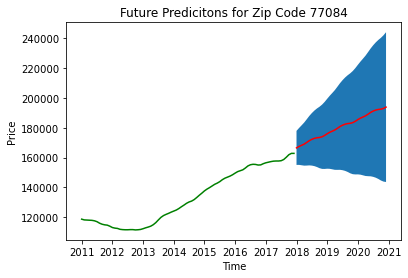

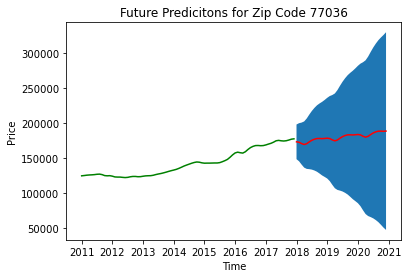

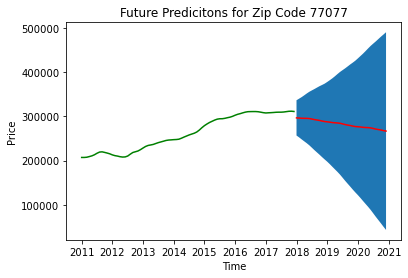

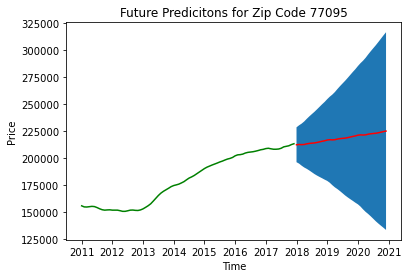

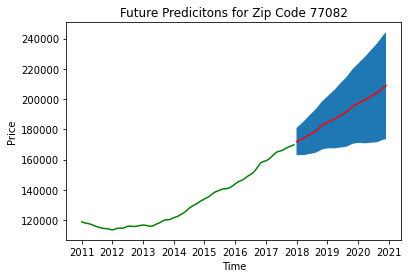

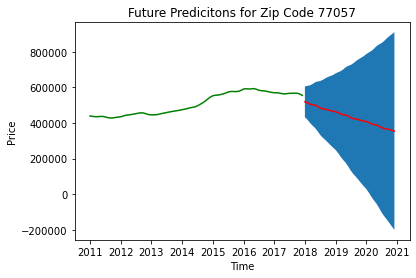

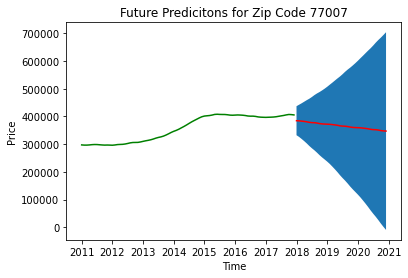

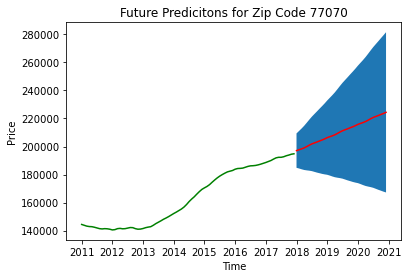

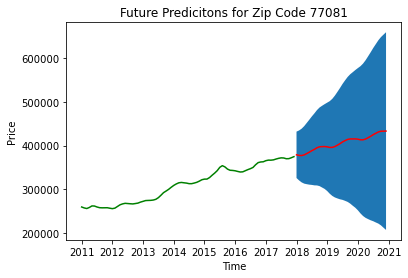

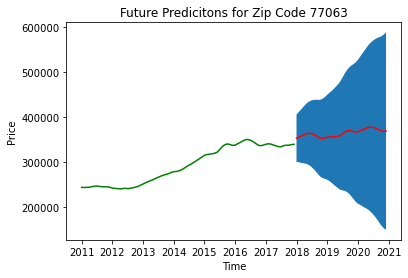

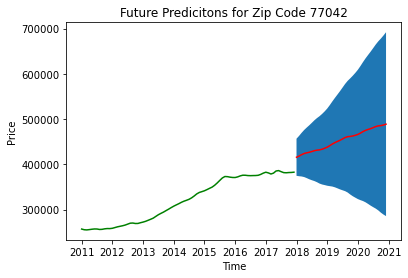

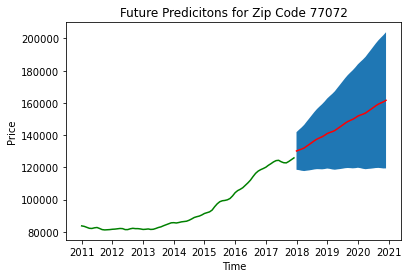

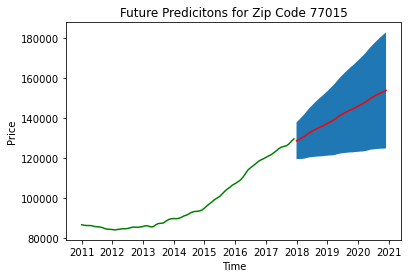

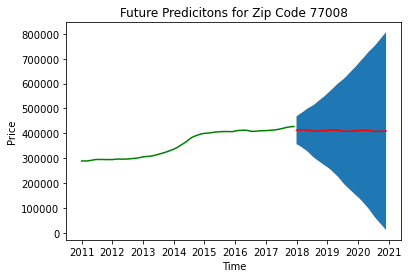

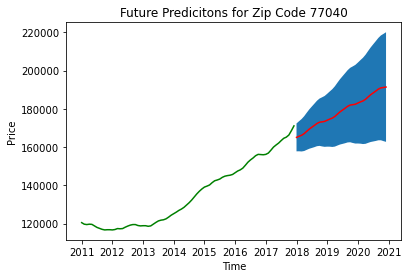

In [55]:
for r in range(len(zip_col)):
    future_plot(zip_col[r],r)

Ploting all zip codes current mean with future prediciton mean and confidence intervals. 

#### Mean Squared Error over Time

Comparing the average mean predicted to the confidence interval, over time. 

In [33]:
mse_future_conf_df = pd.DataFrame()
for r in range(len(zip_col)):
    conf_int_indexed = pred_res[r].conf_int().set_index(future_dti)
    
    mse = round(sqrt(mean_squared_error(future_mean[zip_col[r]], conf_int_indexed.iloc[:, 0])), 2)
    
    mse_dict = {zip_col[r]: mse}
    mse_series = pd.Series(mse_dict)
    mse_series.index = [0]
    mse_future_conf_df = pd.concat([mse_future_conf_df, mse_series], axis=1)

In [34]:
mse_future_conf_df.columns = df.columns
mse_future_conf_df

,77084,77036,77077,77095,77082,77057,77007,77070,77081,77063,77042,77072,77015,77008,77040
0,32071.25,85860.69,135275.31,55834.99,23074.01,331411.25,210815.63,36454.65,143195.94,138043.88,124985.69,28207.95,20119.16,233293.93,18681.08


In [35]:
mse_future_conf_df_sort = mse_future_conf_df.sort_values(by=[0] , axis=1)
mse_future_conf_df_sort.iloc[:, :5]

,77040,77015,77082,77072,77084
0,18681.08,20119.16,23074.01,28207.95,32071.25


The top 5 zip code models with the lowest mean squared error for their predicitons:
 - 77040
 - 77015
 - 77082
 - 77072
 - 77084

#### Plotting the top Models

In [36]:
#filter top prediction model

In [37]:
top_5_zip = df.loc[:, ['77040', '77015', '77082', '77072', '77084']]

In [38]:
top_5_future = future_mean.loc[:, ['77040', '77015', '77082', '77072', '77084']]

In [39]:
top_5_models = pd.concat([top_5_zip, top_5_future], axis=0)

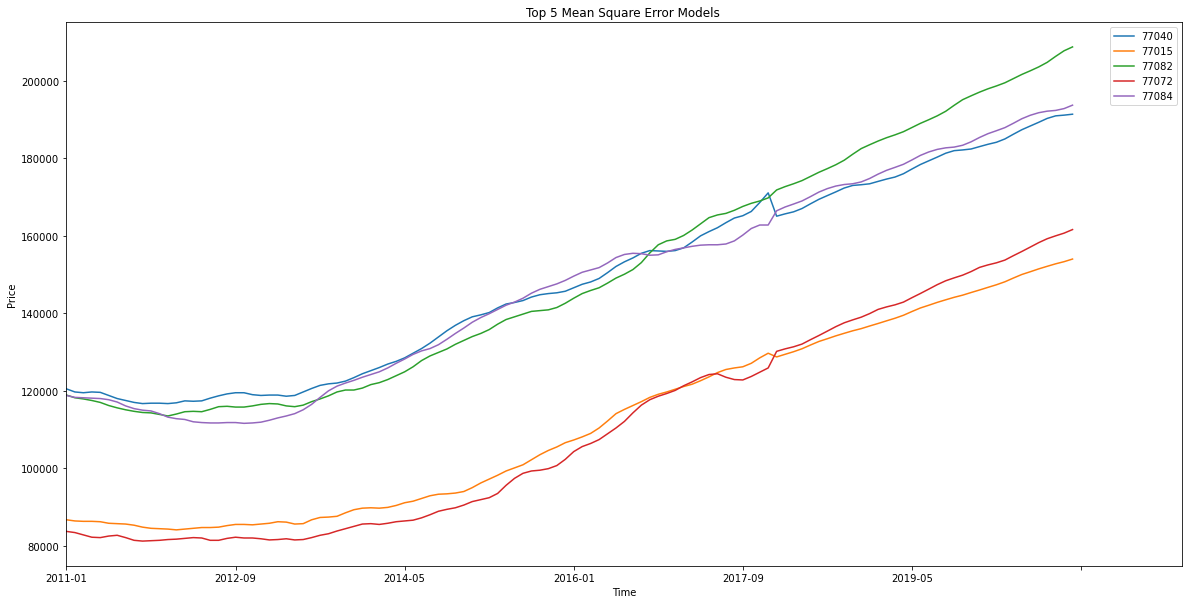

In [40]:
top_5_models.plot(figsize=(20,10), 
                  use_index=True, 
                  xlim=(0,132), 
                  title= 'Top 5 Mean Square Error Models ',
                  xlabel='Time', 
                  ylabel='Price');

In [41]:
for c in top_5_models.columns:
    print('')
    print('Zip Code: {}' .format(c))
    print('')
    print('Date: {}' .format(top_5_models[c].idxmin()))
    print('Minimum Value: ${}'.format(round(top_5_models[c].min(),2)))
    print('')
    print('Date: {}' .format(top_5_models[c].idxmax()))
    print('Maximum Value: ${}' .format(round(top_5_models[c].max(),2)))
    print('---------------------------------------------------------------------------')



Zip Code: 77040

Date: 2011-10
Minimum Value: $116700.0

Date: 2020-12
Maximum Value: $191406.78
---------------------------------------------------------------------------

Zip Code: 77015

Date: 2012-02
Minimum Value: $84100.0

Date: 2020-12
Maximum Value: $154015.97
---------------------------------------------------------------------------

Zip Code: 77082

Date: 2012-01
Minimum Value: $113500.0

Date: 2020-12
Maximum Value: $208781.13
---------------------------------------------------------------------------

Zip Code: 77072

Date: 2011-10
Minimum Value: $81200.0

Date: 2020-12
Maximum Value: $161626.68
---------------------------------------------------------------------------

Zip Code: 77084

Date: 2012-10
Minimum Value: $111600.0

Date: 2020-12
Maximum Value: $193743.94
---------------------------------------------------------------------------


In [42]:
model_diff_li = []
for c in top_5_models.columns:
    model_diff = top_5_models[c].max() - top_5_models[c].min() 
    model_sum = top_5_models[c].max() + top_5_models[c].min()
    model_growth_pred = (model_diff / (model_sum/2)) * 100
    model_diff_li.append(model_growth_pred)

In [43]:
model_diff_li

[48.49408234732305,
 58.724303111287654,
 59.12920021703735,
 66.24204732500239,
 53.80420440468101]

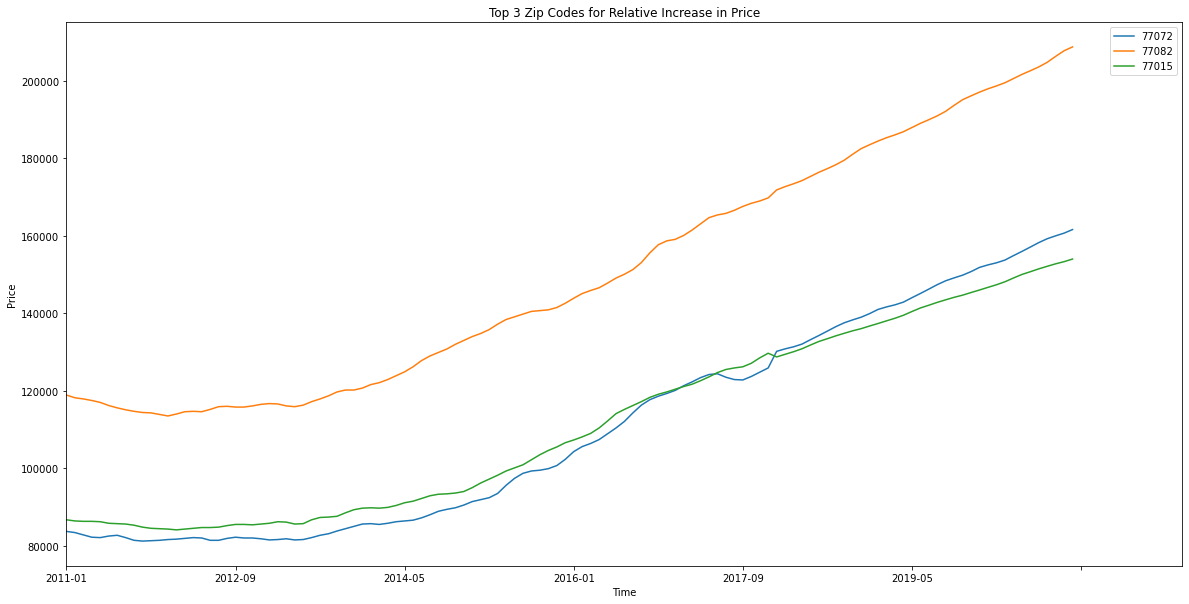

In [44]:
top_5_models.loc[:, ['77072', '77082', '77015']].plot(figsize=(20,10), 
                                                      use_index=True, 
                                                      xlim=(0,132),
                                                      title= 'Top 3 Zip Codes for Relative Increase in Price',
                                                      xlabel='Time', 
                                                      ylabel='Price');

Zip codes , have a differnce minimum price and maximum price, over the average of the minimum and maximum. 

### Comparing confidence intervals.

In [45]:
# t test top confidence intervals
stats.ttest_ind(pred_res[0].conf_int().iloc[:, 1], pred_res[1].conf_int().iloc[:, 1])

Ttest_indResult(statistic=-6.437175292732093, pvalue=1.3042619593494665e-08)

In [46]:
# t test bottom confidence intervals
stats.ttest_ind(pred_res[0].conf_int().iloc[:, 0], pred_res[1].conf_int().iloc[:, 0])

Ttest_indResult(statistic=9.73466517987437, pvalue=1.2074714820453126e-14)

In [47]:
#compare all confidence intervals against each other


In [94]:
def compare_conf_int(predictor):
    '''
    Enter the SARIMA predictor. This function will make combinations 
    of each predictor so I am able to perform a t test on the high 
    and low confidence interval.
    '''

    #making all combinations in groups of 2
    # this is to t-test each combination of models
    sarima_model_combos = list(combinations(predictor, 2))
    
    # t-test each combination of confidence intervals
    for r in range(0,len(sarima_model_combos)):
        #bottom conf interval
        t_result_bottom = stats.ttest_ind(sarima_model_combos[r][0].conf_int().iloc[:, 0], sarima_model_combos[r][1].conf_int().iloc[:,0])
        
        # top confidence interval
        t_result_top = stats.ttest_ind(sarima_model_combos[r][0].conf_int().iloc[:, 1], sarima_model_combos[r][1].conf_int().iloc[:,1])
        
        if t_result_bottom[1] <= .05 and t_result_top[1] <= .05:
            #print('{}'.format(df.columns[r]))
            print('Low confidence interval p-value: {}'.format(t_result_bottom[1]))
            print('High confidence p-value: {}'.format(t_result_top[1]))
            print()

In [95]:
compare_conf_int(pred_res)

Low confidence interval p-value: 1.2074714820453126e-14
High confidence p-value: 1.3042619593494665e-08

Low confidence interval p-value: 2.684292884790399e-06
High confidence p-value: 3.6007973339429037e-16

Low confidence interval p-value: 9.787320659387038e-37
High confidence p-value: 1.7108707823534704e-09

Low confidence interval p-value: 8.11365278663826e-31
High confidence p-value: 4.0505620190815456e-39

Low confidence interval p-value: 3.4515096713296247e-17
High confidence p-value: 3.387417358065959e-39

Low confidence interval p-value: 2.3889686927680214e-51
High confidence p-value: 1.7438251792718025e-40

Low confidence interval p-value: 2.159141673483383e-59
High confidence p-value: 3.992390901979059e-12

Low confidence interval p-value: 2.927440355080942e-53
High confidence p-value: 2.500751555445391e-19

Low confidence interval p-value: 0.0051955719254447984
High confidence p-value: 6.092315827152169e-35

Low confidence interval p-value: 9.435092364068324e-26
High confid

In [104]:
pred_res[0].conf_int

<bound method PredictionResults.conf_int of <statsmodels.tsa.statespace.mlemodel.PredictionResults object at 0x000001D360832520>>

In [134]:
pred_res[0].summary_frame()

77084,mean,mean_se,mean_ci_lower,mean_ci_upper
2018-01-01,166471.305328,5806.773654,155090.238100,177852.372557
2018-02-01,167451.564716,6297.611028,155108.473913,179794.655520
2018-03-01,168214.649330,6818.854716,154849.939672,181579.358988
2018-04-01,169010.355346,7355.219719,154594.389598,183426.321095
2018-05-01,170129.438700,7895.994380,154653.574093,185605.303307
2018-06-01,171303.847134,8433.967698,154773.574199,187834.120069
2018-07-01,172198.874685,8964.454628,154628.866473,189768.882897
2018-08-01,172859.598549,9484.538028,154270.245604,191448.951494
2018-09-01,173258.115146,9992.516588,153673.142518,192843.087774
2018-10-01,173450.703131,10487.514746,152895.551940,194005.854321


In [52]:
mse_future_conf_df_sort

,77040,77015,77082,77072,77084,77070,77095,77036,77042,77077,77063,77081,77007,77008,77057
0,18681.08,20119.16,23074.01,28207.95,32071.25,36454.65,55834.99,85860.69,124985.69,135275.31,138043.88,143195.94,210815.63,233293.93,331411.25
